In [80]:
import pandas as pd
import numpy as np

from matplotlib import font_manager as fm
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import matplotlib as mpl

import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import *
from brokenaxes import brokenaxes

### 데이터 설명 
1. **우울증환자(명)**: 30~59세 사이의 인구중 국민건강검진이후 일상생활에 지장이 있을정도의 우울증을 격는 사람 - 각 도시의 인구 10만명 당으로 계산 
2. **진단수(명)**: 각 도시마다 30~59세 사이의 인구중 우울증 치료를 목적으로 병원을 방문한 숫자 - 각 도시의 인구 10만명 당으로 계산 
3. **평균보험료(원)**: 각도시마다의 30~59세(working population)사이의 인구의 평균보험료

## 각 시도별 수입과 우울증의 상관분석 

In [81]:
df = pd.read_csv('all_combined.csv')
df

,Unnamed: 0,시군구별,우울증환자(10만명당),평균보험료(원),조정우울(10만명당)
0,0,서울,504.546279,128688,1796.8
1,1,부산,439.687496,104762,1955.7
2,2,대구,67.277887,115111,1699.0
3,3,인천,1177.079806,100195,1458.6
4,4,광주,172.736260,109852,1467.5
5,5,대전,343.875700,110355,1835.8
6,6,울산,417.060198,131744,1042.8
7,7,세종,75.608767,107897,1310.6
8,8,경기,2227.139602,108340,1120.2
9,9,강원,384.499669,112611,1601.9


In [82]:
df_1 = df.drop('Unnamed: 0', axis=1)
df_1.head()

,시군구별,우울증환자(10만명당),평균보험료(원),조정우울(10만명당)
0,서울,504.546279,128688,1796.8
1,부산,439.687496,104762,1955.7
2,대구,67.277887,115111,1699.0
3,인천,1177.079806,100195,1458.6
4,광주,172.736260,109852,1467.5


In [83]:
df_sorted = df_1.sort_values(by='평균보험료(원)')
df_sorted.head(10)

,시군구별,우울증환자(10만명당),평균보험료(원),조정우울(10만명당)
16,제주,482.034119,99280,1711.9
3,인천,1177.079806,100195,1458.6
14,경북,591.806714,102965,1291.9
1,부산,439.687496,104762,1955.7
11,충남,579.842973,106567,1384.7
7,세종,75.608767,107897,1310.6
15,경남,834.355164,108135,992.4
8,경기,2227.139602,108340,1120.2
4,광주,172.736260,109852,1467.5
13,전남,359.581286,109878,1034.0


In [84]:
# 국민건강검진 결과 일상생활에 지장이 될정도의 우울증을 격난 환자수(인구 10만명당): 우울증환자(명)
# 우울증상으로 인한 병원 진단 현황(인구 10만명당) : 진단수(명)
df_sort = df_sorted.rename(columns={"시군구별": "시도별", "우울증환자(10만명당)": "우울증환자(명)", "조정우울(10만명당)":"진단수(명)"})
df_sort.head()

,시도별,우울증환자(명),평균보험료(원),진단수(명)
16,제주,482.034119,99280,1711.9
3,인천,1177.079806,100195,1458.6
14,경북,591.806714,102965,1291.9
1,부산,439.687496,104762,1955.7
11,충남,579.842973,106567,1384.7


Text(0.5, 1.0, '평균보험료 vs 우울증지수')

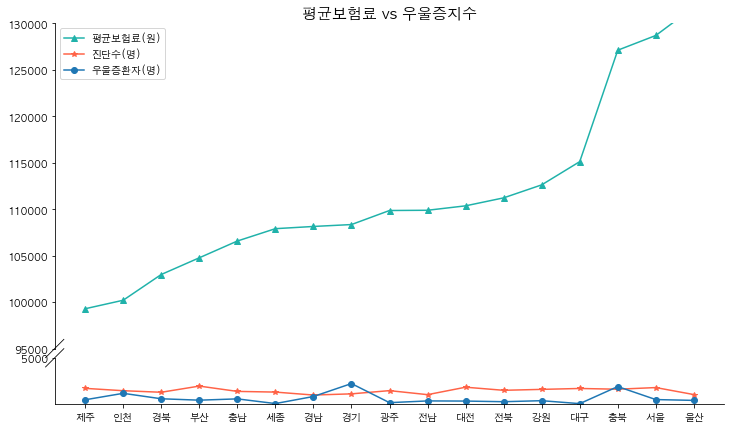

In [85]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["figure.figsize"] = (12, 7)
a = list(df_sort['평균보험료(원)'])
aa = np.array(a)
b = list(df_sort['진단수(명)'])
bb = np.array(b)
c = list(df_sort['시도별'])
cc = np.array(c)
d = list(df_sort['우울증환자(명)'])
dd = np.array(d)

box = brokenaxes( ylims=((50, 5000), (95000, 130000)), hspace=.05)

box.plot(cc, aa, marker = '^', color = 'lightseagreen', label = '평균보험료(원)')
box.plot(cc, bb, marker = '*', color = 'tomato', label = '진단수(명)')
box.plot(cc, dd, marker = 'o', label = '우울증환자(명)')
box.set_xticks(cc)
box.legend(loc='upper left')
plt.title('평균보험료 vs 우울증지수', fontsize = 15, fontweight='bold')

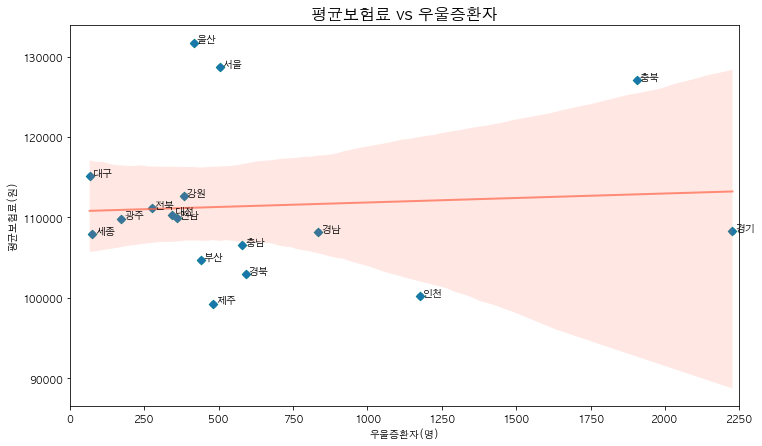

In [86]:
fig,ax = plt.subplots(figsize=(12,7))
x = df_sort['우울증환자(명)']
y = df_sort['평균보험료(원)']

plt.scatter(x, y
            ,color='teal'
            ,marker='D')

plt.title('평균보험료 vs 우울증환자', fontsize = 16, fontweight='bold')
sns.regplot(x=df_sort['우울증환자(명)'], y=df_sort['평균보험료(원)'], line_kws={"color":"tomato","alpha":0.7,"lw":2})
ax.set(xlim=(0, 2250))
for line in range(0,df.shape[0]):
     plt.text(x[line]+10, y[line]+10, df_sort['시도별'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')

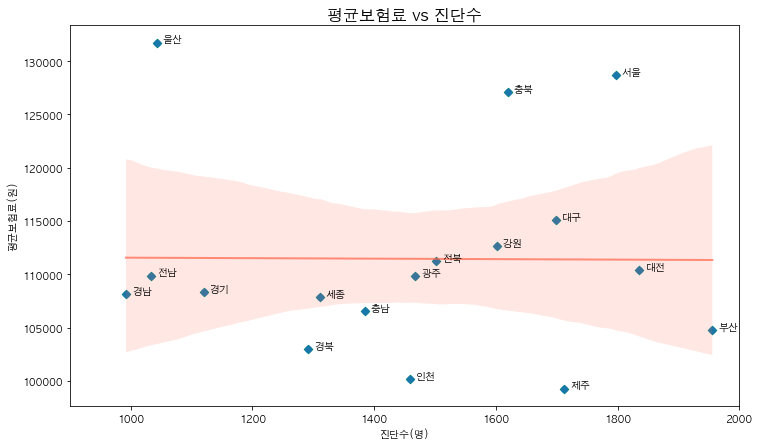

In [87]:
fig,ax = plt.subplots(figsize=(12,7))
z = df_sort['진단수(명)']
y = df_sort['평균보험료(원)']

plt.scatter(z, y
            ,color='teal'
            ,marker='D') 

plt.title('평균보험료 vs 진단수', fontsize = 16, fontweight='bold')
sns.regplot(x=df_sort['진단수(명)'], y=df_sort['평균보험료(원)'], line_kws={"color":"tomato","alpha":0.7,"lw":2})
ax.set(xlim=(900, 2000))

for line in range(0,df.shape[0]):
     plt.text(z[line]+10, y[line]+10, df_sort['시도별'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()

In [88]:
x = df_sort['우울증환자(명)']
z = df_sort['진단수(명)']

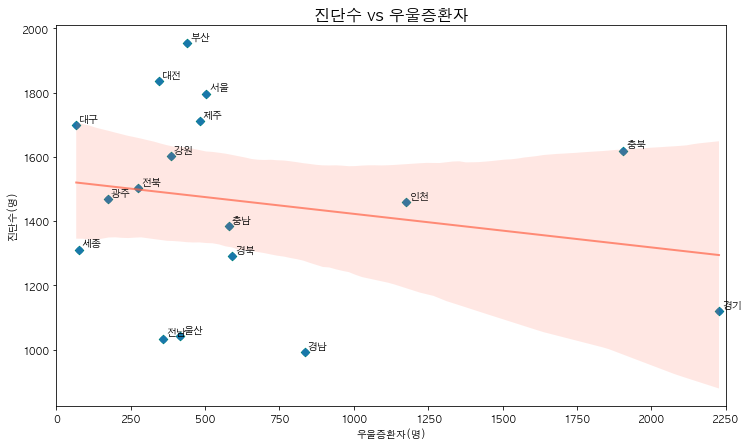

In [89]:
fig,ax = plt.subplots(figsize=(12,7))
plt.scatter(x, z
            ,color='teal'
            ,marker='D') 


plt.title('진단수 vs 우울증환자', fontsize = 16, fontweight='bold')
sns.regplot(x=x, y=z, line_kws={"color":"tomato","alpha":0.7,"lw":2})
ax.set(xlim=(0, 2250))

for line in range(0,df.shape[0]):
     plt.text(x[line]+10, z[line]+10, df_sort['시도별'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()

In [90]:
pearsonr(df_sort['우울증환자(명)'],df_sort['평균보험료(원)']) 

(0.07133910164869547, 0.785560194472705)

In [91]:
pearsonr(df_sort['진단수(명)'],df_sort['평균보험료(원)']) 

(-0.007171996260820823, 0.9782056240712191)

In [92]:
pearsonr(df_sort['우울증환자(명)'],df_sort['진단수(명)']) 

(-0.21199587520643015, 0.4140142733146139)

In [93]:
df_sort.drop('시도별',axis=1).corr(method='pearson')

,우울증환자(명),평균보험료(원),진단수(명)
우울증환자(명),1.000000,0.071339,-0.211996
평균보험료(원),0.071339,1.000000,-0.007172
진단수(명),-0.211996,-0.007172,1.000000


## Conclusion 

 1. 검사 결과 우울증으로 판정된 사람수의 증가율과 수입은 서로 낮은 상관관계를 보인다 
 2. 우울증으로 병원 방문자수와 수입은 상관관계를 보이지 않는다 = -0.007 = 0 
 3. 우울증을 겪고 있는 환자가 많은것과 그 도시의 우울증으로 인한 병원 방문수는 관련이 없다 
        즉, 우울하다고 모두 병원을 방문하는 것은 아니다 

## 각 시도별 실업률과 우울증의 상관분석

In [94]:
dfdf2 = df_sort[['시도별','우울증환자(명)','진단수(명)']]
dfdf2.head()

,시도별,우울증환자(명),진단수(명)
16,제주,482.034119,1711.9
3,인천,1177.079806,1458.6
14,경북,591.806714,1291.9
1,부산,439.687496,1955.7
11,충남,579.842973,1384.7


In [95]:
dfdf = pd.read_csv('시도별_실업율(30~59세)csv.csv')
dfdf.head()

,Unnamed: 0,시도별,30~59세 실업률
0,0,서울특별시,3.2
1,4,부산광역시,2.4
2,8,대구광역시,2.9
3,12,인천광역시,3.1
4,16,광주광역시,2.5


In [96]:
df_new = dfdf.rename(columns= {'30~59세 실업률':'실업률(%)'})
df_new.head()

,Unnamed: 0,시도별,실업률(%)
0,0,서울특별시,3.2
1,4,부산광역시,2.4
2,8,대구광역시,2.9
3,12,인천광역시,3.1
4,16,광주광역시,2.5


In [97]:
jobless = df_new[['실업률(%)']]
jobless.head()

,실업률(%)
0,3.2
1,2.4
2,2.9
3,3.1
4,2.5


In [98]:
job_1 = pd.concat([dfdf2,jobless],axis=1)
job_1.head()

,시도별,우울증환자(명),진단수(명),실업률(%)
0,서울,504.546279,1796.8,3.2
1,부산,439.687496,1955.7,2.4
2,대구,67.277887,1699.0,2.9
3,인천,1177.079806,1458.6,3.1
4,광주,172.736260,1467.5,2.5


In [99]:
# 그래프 plot했을때 서로의 관계를 확인하기 위해 30 ~ 59세의 실업률 %를 (명)수로 조정 (곱하기 10만 나누기 100)
job_1['실업률(%)'] = job_1['실업률(%)']* 1000
job = job_1.rename(columns={'실업률(%)':"실업자(명)"})
job

,시도별,우울증환자(명),진단수(명),실업자(명)
0,서울,504.546279,1796.8,3200.0
1,부산,439.687496,1955.7,2400.0
2,대구,67.277887,1699.0,2900.0
3,인천,1177.079806,1458.6,3100.0
4,광주,172.736260,1467.5,2500.0
5,대전,343.875700,1835.8,2900.0
6,울산,417.060198,1042.8,3100.0
7,세종,75.608767,1310.6,1700.0
8,경기,2227.139602,1120.2,2700.0
9,강원,384.499669,1601.9,2100.0


Text(0.5, 1.0, '실업자수 vs 우울지수')

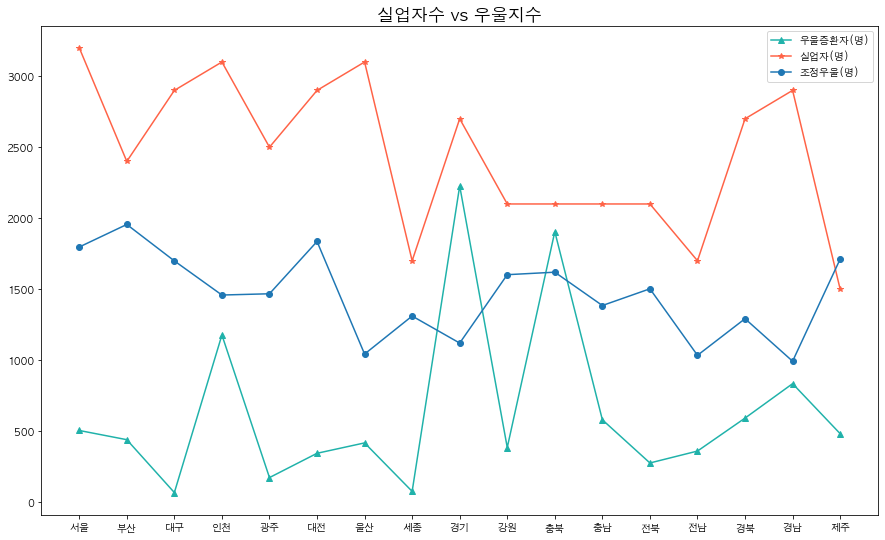

In [100]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["figure.figsize"] = (15, 9)

e = list(job['우울증환자(명)'])
ee = np.array(e)
f = list(job['실업자(명)'])
ff = np.array(f)
g = list(job['시도별'])
gg = np.array(g)
h = list(job['진단수(명)'])
hh = np.array(h)

plt.plot(gg, ee, marker = '^', color = 'lightseagreen')
plt.plot(gg, ff, marker = '*', color = 'tomato')
plt.plot(gg, hh, marker = 'o')
plt.legend(['우울증환자(명)','실업자(명)','조정우울(명)'], loc='upper right')
plt.title('실업자수 vs 우울지수',fontsize = 17, fontweight='bold')

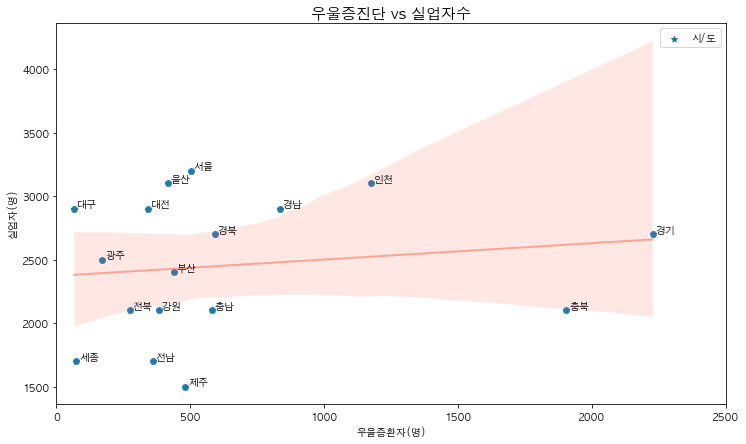

In [109]:
fig,ax = plt.subplots(figsize=(12,7))
i = job['우울증환자(명)']
p = job['실업자(명)']

plt.scatter(i, p
            ,color='teal'
            ,marker='*',label="시/도")

plt.title('우울증진단 vs 실업자수',fontsize = 15, fontweight='bold')
sns.regplot(x=i, y=p, line_kws={"color":"tomato","alpha":0.5,"lw":2})
plt.legend(loc='upper right')
ax.set(xlim=(0, 2500))
for line in range(0,df.shape[0]):
     plt.text(i[line]+10, p[line]+10, df_sort['시도별'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')

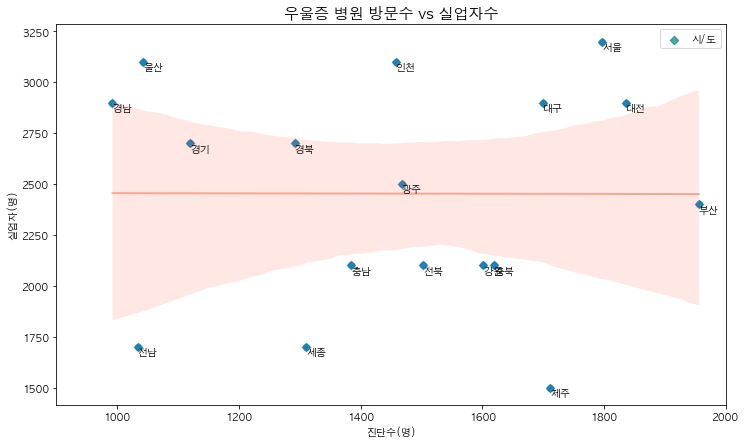

In [110]:
fig,ax = plt.subplots(figsize=(12,7))
k = job['진단수(명)']
o = job['실업자(명)']

plt.scatter(k, o
            ,color='teal'
            ,marker='D',label="시/도")

plt.title('우울증 병원 방문수 vs 실업자수',fontsize = 15, fontweight='bold')
sns.regplot(x=k, y=o, line_kws={"color":"tomato","alpha":0.5,"lw":2})
plt.legend(loc='upper right')
ax.set(xlim=(900, 2000))
for line in range(0,df.shape[0]):
     plt.text(k[line]+0., o[line]+0.7, df_sort['시도별'][line], verticalalignment='top', size='medium', color='black', weight='semibold')

In [103]:
pearsonr(job['우울증환자(명)'],job['실업자(명)']) 

(0.14397082698730443, 0.5814433391464398)

In [104]:
pearsonr(job['진단수(명)'],job['실업자(명)']) 

(-0.0024989926350672265, 0.992405277972802)

In [105]:
job.drop('시도별',axis=1).corr(method='pearson')

,우울증환자(명),진단수(명),실업자(명)
우울증환자(명),1.000000,-0.211996,0.143971
진단수(명),-0.211996,1.000000,-0.002499
실업자(명),0.143971,-0.002499,1.000000


## Conclusion
    1. 우울증과 실업률은 0.14로 양의 상관관계를 가진다 
    2. 사람들의 소득보다는 실업률이 우울증과 더 밀접한 관계를 가진다 
    3. 실업률과 우울증으로 병원을 방문하는 사람들의 관계는 거의 없다 = -0.002 = 0 